## Lecture 1: Classification evaluation metrics, class imbalance

1. When the class is imbalanced, accuracy is not the best metric in ML.
- For example, most of the observations are negative, and only a few observations are positive
- Then, the model seems to predict the class correctly (there are some "false negative" and "false positive".
- Accuracy is misleading in this case

2. Confusion matrix
- True negative, false positive, false negative, and true positive (positive = things that we are interested in)
- False positive
    - You don't have a cancer, but you are diagnosed as "having a cancer"
    - False alarm
- False negative
    - You have a cancer, but you are diagnosed as "not having a cancer"
    - You might want to reduce this in a medical context.. 

3. Recall and Precision
- Recall : TP / #positive
    - Among all positive examples, how many did you identify?

- Precision: TP / (TP + FP)
    - Among the positive examples you identified, how many were actually positive?
    
- F1-score
    - combines precision and recall to give one score
    $$ f1 = 2 \times \frac{ precision \times recall}{precision + recall}$$

4. Macro average vs weighted average
- macro average
    - You give **equal importance to all classes** and average over all classes.
    - For instance, in the example above, recall for non-fraud is 1.0 and fraud is 0.63, and so macro average is 0.81.
    - More relevant in case of multi-class problems.

- weighted average
    - Weighted by the **number of samples** in each class.
    - Divide by the total number of samples.
    - Which one is relevant when depends upon whether you think each class should have the same weight or each sample should have the same weight.



5. Precision-recall curve
- A trade-off between precision and recall
    - If you identify more things as positive, recall is going to increase but there are likely to be more false positives.


- Threshold (default=0.5) and recall & precision
    - Decreasing the threshold means a **lower bar for predicting fraud**.<br>
      - recall would either stay the same or go up and precision is likely to go down<br>
      - occasionally, precision may increase if all the new examples after decreasing the threshold are TPs.
    - Increasing the threshold means a **higher bar for predicting fraud**.<br>
      - recall would go down or stay the same but precision is likely to go up<br>
      - occasionally, precision may go down as the denominator for precision is TP+FP.
    - If you want high precision, then we may use a higher threshold. If you want high recall, then we may use a lower threshold.
      
      
- AP vs. F1-score
    - F1 score is for a given threshold and measures the quality of predict.
    - AP score is a summary across thresholds and measures the quality of predict_proba.

6. ROC Curve (Receiver Operating Characteristic Curve)
- Plots sensitivity (recall) against false positive rate
- The top-left is the best case (the precision-recall curve = top-right)
- The curve is monotonic (?)

7. Figuring out why you have a class imbalance.
- One class is much more rare than the other
    - Ex) Credit Card Fraud, Cancer diagnosis, ..
    - You can choose the model based on other metrics, not accuracy.
    
    
- Data collection methods
    - If it's the data collection, then that means your test and training data come from different distributions!

8. Handling imbalance: Changing the training procedure<br>
1) `class_weight`

```python
pipe_lr_weight = make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, 
                                                                    class_weight={1:10}))
pipe_lr_weight.fit(X_train, y_train)
plot_confusion_matrix(pipe_lr_weight, X_valid, y_valid, display_labels=["Non fraud", "fraud"], values_format="d", cmap=plt.cm.Blues);
```


- Set fraud (positive) a weight of 10 by specifying `class_weight={1:10}`
- As a consequence, we get increased `true positive` and decreased `false negative`, but also increased `false positive`!


2) `class_weight = "balanced"`
- This sets the weights so that the classes are equal.
- For example, if we have 587 times more negative examples, then we set `positive` a weight of 587.
- As a consequence, we get increased `true positive` and decreased `false negative`, but also extremely increased `false positive`!
- Recall might be much better, but precision would drop a lot. 

9. Stratified Splits
- Balancing classes by applying a method to data splits.
    - Ex) By default it splits the data so that if we have 10% negative examples in total, then each split will have 10% negative examples.
> This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

    - In other words, if we have 10% negative examples in total, then each fold will have 10% negative examples.

10. Is stratifying a good idea?
- Well, it's no longer a random sample, which is probably theoretically bad, but not that big of a deal.
- If you have many examples, it shouldn't matter as much.
- It can be especially useful in multi-class, say if you have one class with very few cases.

## Lecture 2: Ridge and Regression Evaluation Metrics

### Ridge
- One of the linear regression models
- Using `Ridge` is recommended than using `LinearRegression` because `Ridge` is more flexible.
    - When we use `LinearRegression`, the coefficients get really huge, so it is not really flexible. (Due to `collinear features`)
- Hyperparameter `alpha` controls the fundamental tradeoff.

#### `alpha`
- Controls the fundamental tradeoff.
- Similar to `C` in `LogisticRegression`, but `alpha` is the inverse of `C`: 
    - Larger `alpha` means underfitting, smaller `alpha` means overfitting.
    - Larger alpha makes a model less complex.
    - Larger alpha leads to smaller coefficients: smaller coefficients means that the predictions are less sensitive to changes in the data.

#### `RidgeCV`
- `RidgeCV` automatically tunes `alpha` based on cross-validation.
```python
ridgecv = make_pipeline(preprocessor, RidgeCV(alphas=alphas))
ridgecv.fit(X_train, y_train);
ridgecv[1].alpha_
```

### Regression score functions
#### Mean squared error (MSE)
```python
preds = lr_tuned.predict(X_train)
np.mean((y_train - preds)**2)
>> 865443401.1072435
```

- The average of (actual value - predicted value)^2
- The unit of MSE is (the unit of target)^2
    - The number gets huge: $dollar$ -> $dollar^2$
- The score depends on the scale of the targets.

#### $R^2$
- The default scoring method when you call `.score()`
- This is mean squared error, but flipped (higher is better), and normalized so the max is 1.
- The maximum 1 means perfect predictions
- Negative values are really bad: worse than `DummyRegressor`.

#### Root mean squared error (RMSE)
- A more realistic metric than the mean squared error
    - The unit of the RMSE is the same as the unit of the target
- However, this error might not be a reasonable error for a certain x values. 
    - For example, for a house worth $60,000, the error of $30,000 is terrible.
    
    
```python
np.sqrt(mean_squared_error(y_train, lr_tuned.predict(X_train)))
>>> 29418.419418915822
```

#### MAPE (mean absolute percent error)
- Calculating MAPE: Difference between predicted values and y values, divided by y value (abs). Then, calculate the mean value and get the percentage.

```python
def mape(true, pred):
    return 100.*np.mean(np.abs((pred - true)/true))

mape(y_train, pred_train)
>>> 10.123589795169949
```

- cross-validate with `mape()`

```python
def mape(true, pred):
    return 100.*np.mean(np.abs((pred - true)/true))

# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape)

pd.DataFrame(cross_validate(
    lr_tuned, X_train, y_train, return_train_score=True, scoring=mape_scorer
))
```

#### Others
- `neg_mean_squared_error`

```python
pd.DataFrame(cross_validate(
    lr_tuned, X_train, y_train, return_train_score=True, 
    scoring="neg_mean_squared_error"
))
```

### Summary
#### Ridge
- House prices dataset target is price, which is numeric -> regression rather than classification
- There are corresponding versions of all the tools we used:
    - DummyClassifier -> DummyRegressor
    - LogisticRegression -> Ridge
- Ridge hyperparameter `alpha` is like LogisticRegression hyperparameter `C`, but opposite meaning

#### Scoring metrics
- $R^2$ is the default .score(), it is unitless, 0 is bad, 1 is best
- MSE (mean squared error) is in units of target squared, hard to interpret; 0 is best
- RMSE (root mean squared error) is in the same units as the target; 0 is best
- MAPE (mean average percent error) is unitless; 0 is best, 1 is bad

## Lecture 3: Non-linear regression, RBFs, feature engineering

### What is feature engineering?

1. Definition
> Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

    - Better features usually help more than a better model.
    
    
2. Good features
- Capture most important aspects of the problem
- Allow learning with few examples
- Generalize to new scenarios


3. Trade-off between simple and expressive features:
- Simple feature: low in risk of overfitting, but also low in scores.
- Complicated features: scores can be high, but also high in risk of overfitting.


4. Domain-specific transformations
- The best feature transformations are application-dependent.
    - Examples:
        - Sound data - Fourier coefficients and spectrograms
        - Image data - Wavelets

- General advice:
    - Ask the domain experts
    - Go through academic papers in the discipline
    - Often have idea of right discretization/standardization/transformation
    - If no domain expert, cross-validation will help

### Polynomial feature transformations for non-linear regression

#### 1. Linear regression
- Interested in predicting a scalar valued target
$$\hat{y} = w^Tx+b$$
    - $\hat{y}$ -> prediction
    - $w$ -> weight vector
    - $b$ -> bias (w, b = parameters)
    - $x$ -> feature vector
 
 
- Find parameters $w$ and $b$ that minimize the squared error between the predicted $\hat{y}$ and true $y$.
    - This is what the model does during the training phase.
    $$ f(w) = \frac{1}{2}\sum_{i=0}^{n}{(w^Tx_i - y_i)^2}$$
  
        - A bias term is incorporated as $w_0$, with a dummy feature $x_0$ whose value is always 1. 
        
        - For example,
            - Suppose $X$ has only one feature, say $x_1$: 
        $$X = \begin{bmatrix}0.86 \\ 0.02 \\ -0.42 \end{bmatrix}$$ 
            - Make a new matrix $Z$ with an extra feature (say $x_0$) whose value is always 1. 
        $$Z = \begin{bmatrix}1 & 0.86\\ 1 & 0.02 \\ 1 & -0.42\\ \end{bmatrix}$$
            - Use $Z$ instead of $X$ in linear regression. 

#### 2. Non-linear regression (Polynomial feature mappings or transforms)
- We can use feature mappings to use least squares to fit non-linear models.


**Example: polynomial feature mappings or transforms**
- Suppose $X$ has only one feature, say $x_1$
$$X = \begin{bmatrix}0.86 \\ 0.02 \\ -0.42 \end{bmatrix}$$ 

- Our $Z$ will have three features $x_0$, $x_1$, $x_1^2$ with polynomial with degree 2. 
$$Z = \begin{bmatrix}1 & 0.86 & 0.74\\ 1 & 0.02 & 0.0004\\ 1 & -0.42 & 0.18\\ \end{bmatrix}$$

<br> 

- $Z$ $\rightarrow$ augmented dataset with quadratic features
- `fit`: We fit using $Z$ and learn weights $v$. 
- `predict`: When we predict, we need to apply the same transformations on the test example and add these features in the test example and predict using learned weights $v$.

> **$\hat{y}$ is a linear function of $v$ and $Z$ but a polynomial function of original features $X$**

#### 3. Adding polynomial features
- Use sklearn's `PolynomialFeatures`

```python
from sklearn.preprocessing import PolynomialFeatures
deg = 2
poly_feats = PolynomialFeatures(degree=deg)
X_enc = poly_feats.fit_transform(X)           # transform a feature to polynomial features

lr_poly = LinearRegression()
lr_poly.fit(X_enc, y)
preds = lr_poly.predict(X_enc)
```

- `PolynomialFeatures` with `make_pipeline`

```python
degree = 20
pipe_poly = make_pipeline(PolynomialFeatures(degree = degree), LinearRegression())

pipe_poly.fit(X, y)
preds = pipe_poly.predict(X)
```

- Extract learned coefficients for the transformed features

```python
pd.DataFrame(pipe_poly.named_steps['linearregression'].coef_.transpose(), 
             index=pipe_poly.named_steps['polynomialfeatures'].get_feature_names(), 
             columns = ['Feature coefficients'])
```

#### 4. How do we know what degree of polynomial to use?
- Plotting data?
    - It cannot take us much further
    - Not possible to visualize high dimensional data
- Considering one feature at a time?
    - When features interact with each other, it's hopeless
    - There is a possibility to draw misleading conclusions
- Hyperparameter optimization 
    - Can be potentially very slow.

#### 5. Non-linearly separable data
- You can use a linear classifier with transformed features. 

```python
poly = PolynomialFeatures(2, include_bias=False)
X_transformed = poly.fit_transform(X)
svm = SVC(kernel="linear", C=100)
svm.fit(X_transformed,y)
print("Training accuracy", svm.score(X_transformed,y))
```

### Radial Basis Functions (RBF)
- The idea of transforming features and creating new features is also referred to as change of basis.
- With polynomial basis, we have roughly $O(d^p)$ feature combinations -- problematic! 
- We can use "Kernel trick" to efficiently approach to map features!

#### 1. Kernel Trick
- Computationally efficient approach to map features
- Calculate these relationships in higher dimensional space **without actually carrying out the transformation**.
- Overall, saying something is a "kernel method" correspond to this idea of implicitly calculating relationships in data in higher dimensional space.

#### 2. RBF Kernel
- A weighted nearest-neighbour ("smooth KNN")
- During prediction, the closest examples have a lot of influence on how we classify the new example compared to the ones further away. 


**Radial basis function**
- A set of non-parametric bases that depend on distances to training points
- Non-parametric because size of basis (number of features) grows with $n$. 
- Model gets more complicated as you get more data.


**Example RBFs**
- Similar to polynomial basis, we transform $X$ to $Z$.
- Consider $X_{train}$ with three examples: $x_1$, $x_2$, and $x_3$ and 2 features and $X_{test}$ with two examples: $\tilde{x_1}$ and $\tilde{x_2}$

$$\text{Transform } X_{train} = \begin{bmatrix} 1 & 0\\ 2 & 1\\ 1 & 2\end{bmatrix} \text{ to } Z_{train} = \begin{bmatrix} g\lVert x_1 - x_1\rVert & g\lVert x_1 - x_2\rVert & g\lVert x_1 - x_3\rVert\\g\lVert x_2 - x_1\rVert & g\lVert x_2 - x_2\rVert & g\lVert x_2 - x_3\rVert\\g\lVert x_3 - x_1\rVert & g\lVert x_3 - x_2\rVert & g\lVert x_3 - x_3\rVert\end{bmatrix}$$  

$$\text{Transform } X_{test} = \begin{bmatrix} 2 & 1\\ 1 & 1 \end{bmatrix} \text{ to } Z_{test} = \begin{bmatrix} g\lVert \tilde{x_1} - x_1\rVert & g\lVert \tilde{x_1} - x_2\rVert & g\lVert \tilde{x_1} - x_3\rVert\\g\lVert \tilde{x_2} - x_1\rVert & g\lVert \tilde{x_2} - x_2\rVert & g\lVert \tilde{x_2} - x_3\rVert\\\end{bmatrix}$$  

- Have $n$ features, with feature $j$ depending on distance to example $i$.


**Gaussian Radial Basis Functions**
- The most common $g$: $$g(\varepsilon)=\exp\left(-\frac{\varepsilon^2}{2\sigma^2}\right)$$

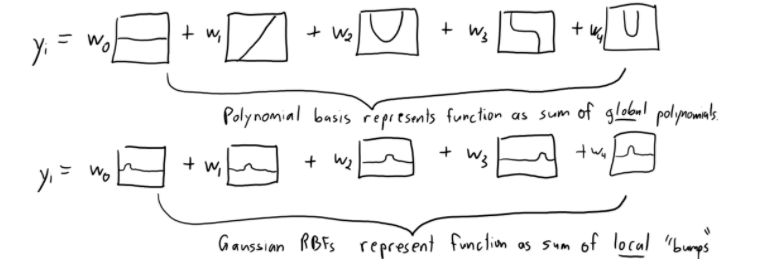


- In our case:
$$g(x_i - x_j)=\exp\left(-\frac{\lVert x_i - x_j\rVert^2}{2\sigma^2}\right)$$
    - $\sigma$ is a hyperparameter that controls the width of the bumps. 
    - Could then fit least squares with different $\sigma$ values


- After transformation:

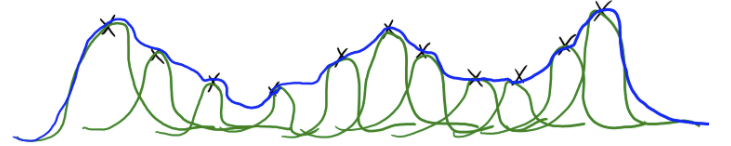


- How many bumps should we use?
    - We use $n$ bumps (non-parametric basis)
- Where should the bumps be centered?
    - Each bump is centered on one training example $x_i$.
- How high should the bumps go?
    - Fitting regression weights $w$ gives us the heights (and signs).
- How wide should the bumps be?
    - The width is a hyper-parameter (narrow bumps = complicated model)
- Enough bumps can approximate **any continuous function to arbitrary precision**.
- But with $n$ data points RBFs have $n$ features
    - How do we avoid overfitting with this huge number of features?
    - We regularize $w$ (coming up next week) and use validation error to choose $\sigma$ and $\lambda$.
    
    
**Interpretation of `gamma` in SVM RBF**
- `gamma` controls the complexity (fundamental trade-off).
    - larger gamma $\rightarrow$ more complex
    - smaller gamma $\rightarrow$ less complex
- `gamma` is related to $\sigma$ in Gaussian RBF.
    - The inverse width of the "bumps"
    - Larger gamma = narrower peaks = More complex model.

(Check this part again)

**Constructing Gaussian RBF with $X$ and $\sigma$**

```
Z = zeros(n,n)
for i1 in 1:n
    for i2 in 1:n
        Z(i1,i2) = exp(-(norm(X[i1:] - X[i2:])**2)/(2 * sigma**2)
```
                       
**Gaussian RBFs: Prediction**

- Prediction in gaussian RBFs
    
   $$\hat{y_i} = w_1 \exp\left(\frac{-\lVert x_i - x_1\rVert^2}{2\sigma^2}\right) +  w_2 \exp\left(\frac{-\lVert x_i - x_2\rVert^2}{2\sigma^2}\right) + \dots + w_n \exp\left(\frac{-\lVert x_i - x_n\rVert^2}{2\sigma^2}\right)
    = \sum_{j = 1}^n w_j \exp\left(\frac{-\lVert x_i - x_j\rVert^2}{2\sigma^2}\right) $$

- **Expensive at test time**: needs distance to all training examples.   
                       
**RBF with regulariation and optimized $sigma$ and $\lambda$**

- A model that is hard to beat:
    - RBF basis with L2-regularization and cross-validation to choose $\sigma$ and $\lambda$.
    - Flexible non-parametric basis, magic of regularization, and tuning for test error
- For each value of $\lambda$ and $sigma$ 
    - Compute $Z$ on training data
    - Compute best weights $V$ using least squares 
    - Compute $\tilde{Z}$ on validation set (using train set distances)
    - Make predictions $\hat{y} = \tilde{Z}v$
    - Compute validation error 

### Common features used in text classification

#### 1. Bag of words
- Each word represents a feature
- Assumes that word order is not important (doesn't care about context)
    - You need to carry out feature engineering.<br>
       Example:
       - Personalized important emails: divide "global" features for all users and "local" features for specific users.

#### 2. N-grams
- A contiguous sequence of $n$ items(characters, tokens) in text.

```python
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(ngram_range=(1,3))
X_counts = vec.fit_transform(X)
bow_df = pd.DataFrame(X_counts.toarray(), columns=vec.get_feature_names(), index=X)
bow_df
```

#### 3. Part-of-speech features
- Syntactic category that tells you some of the grammatical properties of a word.
    - Ex) Noun: water, sun, cat, ... / Verb: run, eat, teach, ...
- POS features use POS information for the words in text.
- We can use pre-trained models to extract POS information (ex. `spaCy`).


**spaCy**
- Extract POS tags

```python
import spacy, en_core_web_md
nlp = en_core_web_md.load()
doc = nlp(sample_text)
print([(token, token.pos_) for token in doc][:20])  

>>> [(Dolly, 'PROPN'), (Parton, 'PROPN'), (is, 'AUX'), (a, 'DET'), (gift, 'NOUN'), (to, 'ADP'), (us, 'PRON'), (all, 'DET'), (., 'PUNCT'), (
, 'SPACE'), (From, 'ADP'), (writing, 'VERB'), (all, 'DET'), (-, 'PUNCT'), (time, 'NOUN'), (great, 'ADJ'), (songs, 'NOUN'), (like, 'SCONJ'), (“, 'PUNCT'), (Jolene, 'PROPN')]

print("Named entities:\n", [(ent.text, ent.label_) for ent in doc.ents])   # named entities

>>> Named entities:
 [('Dolly Parton', 'PERSON'), ('Jolene', 'PERSON'), ('I Will Always Love You', 'WORK_OF_ART'), ('9', 'CARDINAL'), ('5', 'CARDINAL'), ('Netflix', 'ORG'), ('Dolly Parton’s', 'PERSON'), ('Christmas', 'DATE'), ('Christine Baranski', 'PERSON'), ('Christmas Eve', 'DATE'), ('Debbie Allen', 'PERSON'), ('Jennifer Lewis \n', 'PERSON'), ('Parton', 'PERSON'), ('Christmas', 'DATE'), ('Christmas 2020', 'DATE')]
```

### Classify music style from audio files
- A music style classification system to help a song recommendation system.
- Training data: audio files along with their music styles (e.g., classical, blues, pop)
- Prediction task: Given a new raw audio file predict the music style of in the audio.
- Use `librosa` library for feature engineering of audio files.

### Summary
- Feature engineering is finding the useful representation of the data that can help us effectively solve our problem.
- The best feature transformations are application-dependent.
- General advice:
    - Ask the domain experts.
    - Go through academic papers in the discipline.
    - Often have idea of right discretization/standardization/transformation.
    - If no domain expert, cross-validation will help.
    - If you have lots of data, use deep learning methods.

## Lecture 4 : Feature and Model Selection

### 1. Feature Correlations
- If $Y$ goes up when $X$ goes up, then $X$ and $Y$ are positively correlated.
- If $Y$ goes down when $X$ goes up, then $X$ and $Y$ are negatively correlated.
- If $Y$ doesn't change when $X$ changes, then $X$ and $Y$ are uncorrelated.


**Correlation plot: Target-feature**

```python
cor = pd.concat((y_train, X_train_enc),axis=1).iloc[:,:15].corr();
plt.figure(figsize=(15,15))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);
```

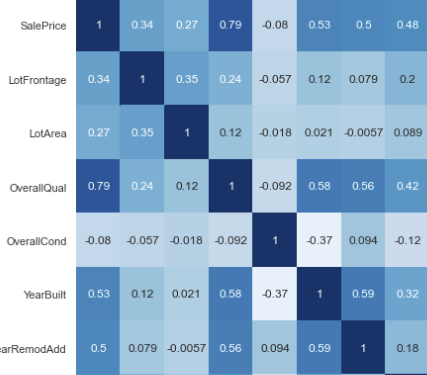

- However, just looking at correlation between the target and features is **extremely simplistic**. 
    - It only looks at each feature in isolation.
    - It only looks at linear associations.
    
    
**Correlation plot: feature-feature**

```python
cor = pd.concat((y_train, X_train_enc),axis=1).iloc[:,10:15].corr();
plt.figure(figsize=(5,5))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);
```

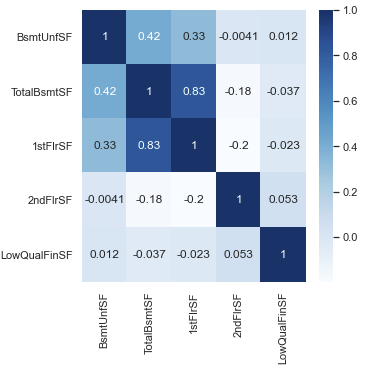

- `1stFlrSF` and `TotalBsmtSF` are highly correlated.
    - Do we need both of them?
    - If our model says `1stFlrSF` is very important and `TotalBsmtSF` is very unimportant, do we trust those values?
    - Maybe `TotalBsmtSF` only "becomes important" if `1stFlrSF` is removed.
    - Sometimes the opposite happens: a feature only becomes important if another feature is added.

### 2. Feature Importances in linear models

#### 2.1 Interpreting coefficients of different types of features

##### 2.1.1 Ordinal features
- For example, if `ExterQual` feature have 'Gd' and 'Ex' ('Gd < 'Ex') as categories, then:
    - The coefficient of `ExterQual` : 3845.22
    - "Increasing by one category of exterior quality (gd -> ex) increases the predicted price by $3845."

##### 2.2.2 Categorical features
- Each category with OHE gets its own coefficient.
- Pick a "reference" category and think about relative importance.

```python
lr_coefs_landslope = lr_coefs[lr_coefs.index.str.startswith("LandSlope")]
lr_coefs_landslope - lr_coefs_landslope.loc["LandSlope_Gtl"]
```

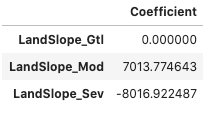

- If you change the category from `LandSlope_Gtl` to `LandSlope_Mod` the prediction price goes up by $\$7013$
- If you change the category from `LandSlope_Gtl` to `LandSlope_Sev` the prediction price goes down by $\$8016$

##### 2.2.3 Numeric features
- You need to care about "scales"

```python
lr_scales = pd.DataFrame(data=np.sqrt(scaler.var_), index=numeric_features, columns=["Scale"])
```

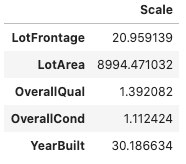

- `LotArea` was divided by 8994.471032 sqft (scale).
- So if the coefficient of `LotArea` is 5134, then 5134 / 8994 (0.57) is the real predicted price that would go up by increasing one square foot.

### 3. Feature selection

#### 3.1 What is feature selection?
> Find the features (columns) $X$ that are important for predicting $y$, and remove the features that aren't.


#### 3.2 Why do we need to select features?
- "Curse of dimensionality"
    - To many features are often not good
- Interpretability
    - Models are more interpretable with fewer features.
- Computation efficiency
    - Models fit/predict faster with fewer columns.
- Data collection efficiency
    - It may be cheaper to collect fewer features.
- Fundamental tradeoff
    - By removing useless features, we can reduce overfitting.
    
> If performance is similar, then why don't we use fewer features?
    
#### 3.3 How do we carry out feature selection?
- Use domain knowledge to discard features
- Or different methods:
    - Recursive feature elimination
    - Forward selection
    - Lasso

#### 3.4 Recursive feature elimination

##### 3.4.1 Algorithm

1. Decide k, the number of features to select.
2. Assign importances to features, e.g. by fitting a model and looking at `coef_` or `feature_importances_`.
3. Remove the least important feature.
4. Repeat steps 2-3 until only k features are remaining.

- Each fitting, remove one feature. (different from just removing all the less important features in one shot)


##### 3.4.2 `RFE`

```python
from sklearn.feature_selection import RFE, RFECV

lr = Ridge(alpha=100)
rfe = RFE(lr, n_features_to_select=30)
```
- `RFE` will select the top 30 features, one at a time, based on the absolute value of `model.coef_`.
- Selected features:

    ```python
    rfe.fit(X_train_enc, y_train)
    selected_columns = X_train_enc.columns[rfe.support_]
    selected_columns
    
    >>> Index(['OverallQual', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageCars', 'ExterQual', 'BsmtQual', 'KitchenQual',
       'GarageFinish_Fin', 'BsmtExposure_Gd', 'BsmtExposure_No',
       'LotConfig_CulDSac', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'MasVnrType_BrkFace', 'Condition1_Norm',
       'RoofStyle_Gable', 'MSSubClass_20', 'SaleType_New', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'Exterior1st_BrkFace', 'BldgType_1Fam',
       'LandContour_Bnk'],
      dtype='object')
    ```
    
##### 3.4.3 Choosing the number of features to select: `RFECV`

```python
from sklearn.linear_model import RidgeCV

pipe_rfe_ridgecv = make_pipeline(preprocessor, RFECV(Ridge(), cv=10), RidgeCV())
scores = cross_validate(pipe_rfe_ridgecv, X_train, y_train, return_train_score=True)
pd.DataFrame(scores).mean()
```
- `RFECV()` automatically selects the proper number of features
    > The number of selected features: `pipe_rfe_ridgecv.named_steps["rfecv"].n_features_`
- Below the number would lower the cross-validation score.


##### 3.4.4 RFE for classification

```python
lr = LogisticRegression(solver="liblinear")
pipe_rfe = make_pipeline(StandardScaler(), RFECV(estimator=lr), LogisticRegression(random_state=123))
```
- The cv score might drop, but it is okay as long as it's similar! (fewer features = more efficient)

#### 3.5 Search and score method (forward selection)
##### 3.5.1 General idea of search method
- $f(S)$ = a scoring function that measures the quality of the set of features $S$.
    - Search for the set of features $S$ with the best score.
- Example: $A, B, C$ features
    - Consider all subsets of features starting from the empty set
    - Choose the subset which gives you the best score!
    
        - Compute **score** for $S = \{\}$
        - Compute **score** for $S = \{A\}$
        - Compute **score** for $S= \{B\}$
        - Compute **score** for $S = \{C\}$
        - Compute **score** for $S = \{A,B\}$    
        - Compute **score** for $S = \{A,C\}$
        - Compute **score** for $S = \{B,C\}$
        - Compute **score** for $S = \{A,B,C\}$  
        
**Scoring**
- We need to pick a metric to measure the quality of the set of features $S$.
    - Based on the metric, we pick the subset.

**Problems with search and score method**
- If there are $d$ features, there are $2^d$ combinations to search.
- Optimization bias is high
- Prone to overfitting

**Two Methods**
- Greedy approaches
- Adding complexity penalty

##### 3.5.2 Model selection: "scoring" method - complexity penalty
- We penalize complex models, and pick a model that have the lowest score.
- Formula:
    $$ score(p) = \frac{1}{2}\lVert{Z_pv -y}\rVert^2 + \lambda k$$
    
    - $k \rightarrow \text{estimated parameters/degrees of freedom}$
    - $\lambda \rightarrow \text{penalization factor}$
    
    $$ score(S) = \frac{1}{2}\sum_i^n(w_s^TX_{iS} -y_i)^2 + size(S)$$

    - Find $S$ and $W_s$ minimizing the squared error + the number of selected features.
    - Example: Suppose $S_1 = \{x_1, x_2, x_4\}$ $S_2 = \{x_1, x_2, x_4, x_5\}$ have similar validation errors, it prefers $S_1$.
    - Instead of $size(S)$, we usually write $L_0$ "norm"
    
    $$ score(S) = \frac{1}{2}\lVert{Xw -y}\rVert^2 + \lambda \lVert w\rVert_0$$
    
    - $L_0 = \lVert w\rVert_0$ norm
    - The number of selected feature (non-zero values)
    - Setting $w_j = 0$ is the same as removing feature. 
    - Smaller $\lVert w\rVert_0$ means we select less features = discard most of the features.

##### 3.5.3 Forward selection: greedy approach for search and score
**Algorithm**
- Given $X = \{x_1, x_2, \dots, x_n\}$ and $y$

1. Start with an empty set of features $S = \{\}$ 
2. Initialize the score (e.g., score = $\infty$, if score is validation error // if score is validation score, then 0 will be the initial score.)
3. For each possible feature $x_j, 1\leq j \leq n$ 
    - Compute the scores of features in **$S$ combined with $x_j$**
    - Only consider one feature + $S$ at a time
4. If **no $x_j$ improves the score**, stop. 
    - If the lower the better, improvement = new best score should be smaller than the current best score.
5. Otherwise add feature $x_j$ to $S$ which improves the score the most, update the score, and go back to step 2. 

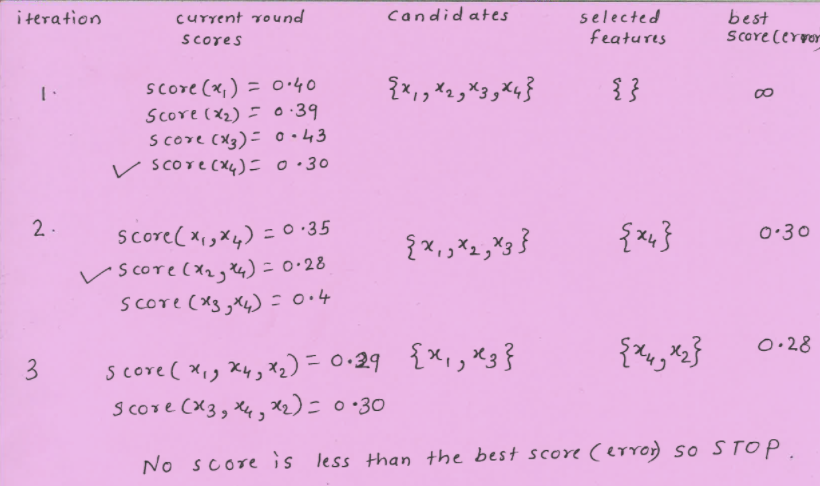

##### 3.5.4 `mlxtend`
- Forward selection

```python
from mlxtend.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(Ridge(), forward=True, k_features=7)

pipe_forward_ridgecv = make_pipeline(
    preprocessor, 
    SequentialFeatureSelector(Ridge(), forward=True, k_features=20),
    RidgeCV(),
)

scores = cross_validate(pipe_forward_ridgecv, X_train, y_train, return_train_score=True)
pd.DataFrame(scores).mean()   ## WITH FORWARD SELECTION
```

##### 3.5.5 Forward selection: advantage and disadvantage
- No guarantee to find the best feature set
- But, it is cheaper: $O(d^2)$
- Overfits less (less optimization bias)

#### 3.6 Other ways to search
- Backward selection (START WITH ALL FEATURES, AND REMOVE ONE AT A TIME)
- Stochastic local search
    - Inject randomness so that we can explore new parts of the search space
    - Simulated annealing
    - Genetic algorithms

**One-hot encoding `drop="First"`**
- We put a "1" for the actual value and "0" otherwise.
- But in fact, do we need all 3 columns?
  - After all, if `B` is 0 and `C` is 0, then `A` must be 1, right?
  - So, we drop one of the columns (usually the first one by convention).
- We can specify this in `OneHotEncoder()` by using the argument `drop='first'`

#### 3.7 Warnings about feature selection 

- A feature is only relevant in the context of other features.
    - Adding/removing features can make features relevant/irrelevant.
- Confounding factors can make irrelevant features the most relevant.
- If features can be predicted from other other features, you cannot know which one to pick. 
- Relevance for features does not have a causal relationship. 
    
#### 3.8 General advice on finding relevant features

- Try the association approach
- Try forward selection with different values of $\lambda$
- Try other feature selection methods (e.g., `RFE`, simulated annealing, genetic algorithms)
- Talk to domain experts; they probably have an idea why certain features are relevant.
- Don't be overconfident. 
    - The methods we have seen probably do not discover the ground truth and how the world really works.
    - They simply tell you which features help in predicting $y_i$.   

### Summary

- Recursive feature elimination (RFE)
    - Fit parameters of a linear model.
    - Prune features with small weights.
    - Repeat till we reach the number of required features.
- Most common approach for feature selection is **search** and **score**. 
- It's hard to define "score" and it's hard to "search". 
- Most common "scores" have the form of $\lVert L_0\rVert$ "norm"

$$ score(S) = \frac{1}{2}\lVert{Xw -y}\rVert^2 + \lambda \lVert w\rVert_0$$

- For "search", we use greedy methods such as forward search. 
- Methods work well on toy data but could be frustrating on real data. 
    - different methods may return very different results

### DSCI 573 - Quiz 1 practice questions. 

Note that these are just sample questions for you to get an idea about what to expect in the quiz. They are neither meant to cover all the topics we have covered in the last four lectures nor meant to be indicative of the number of questions in the actual quiz.

### Question 1
Suppose a search engine returns 20 pages, 10 of which were relevant while failing to return 90 additional relevant pages. What are the  precision and recall of this system? 

#### Solution 
$P = \frac{10}{20}$, $R = \frac{10}{100}$


### Question 2

- Consider the dataset below, which has $4$ training examples and $1$ feature:
$$
X = \begin{bmatrix}3 \\4 \\  2 \\ 1 \end{bmatrix}, \quad y = \begin{bmatrix}1\\-0.4\\-0.2\\-0.1\end{bmatrix}.
$$ 

Suppose we want to fit a degree $p=2$ polynomial to this dataset. Write a feature matrix $Z$ that we could use in a linear regression model to fit such a quadratic model. 

##### Solution

$$
{
Z = \begin{bmatrix}1 & 3 & 9\\ 1 & 4 & 16\\ 1 & 2 & 4\\1 & 1 & 1\end{bmatrix}.
}$$

### Question 3
When we do regression with a polynomial basis, how does the degree of the polynomial $p$ affect the two parts of the fundamental trade-off? (Answer in 1 sentence.)

#### Solution
As $p$ goes up, the training error goes down and approximation error goes up.

### Question 4
Suppose someone proposes to select features by fitting a linear regression model, and choosing the features with the largest regression weights. What is a scenario where this would not be effective at selecting relevant features? (Answer in 1 to 2 sentences.)

#### Solution
Anything collinear (or even close to collinear). Other answers are possible, like if the relationship isn't linear.

### Question 5
Why do we use forward selection instead of exhaustively searching all subsets in search and score methods? (Answer in 1 to 2 sentences.)

#### Solution
It's too expensive to try all subsets. Alternately, forward selection is less prone to false positives.

### Question 6
State whether True or False. 

Assume the following scoring function for search and score methods used with linear models. 
$$ score(S) = \frac{1}{2}\lVert{Xw -y}\rVert^2 + \lambda \lVert w\rVert_0$$

1. Smaller $\lVert w\rVert_0$ means we are discarding most of the features. 
2. $\lambda = 0$ means we are not selecting any of the features. 

#### Solution
1. True 
2. False. λ = 0 means no complexity penalty and it means we are selecting all of the features. 

### Question 7
Why ngram features might be better in some contexts compared to bag-of-word features? (Answer in 1 to 3 sentences.)

#### Solution
Bag-of-word features throw out everything we know about language. Each word is considered independent of its context and its location in text. Ngram features help incorporate context in the input representation. 